In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('wine-data.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [6]:
data = data.drop('quality',axis=1)

In [7]:
from sklearn.preprocessing import label_binarize

In [8]:
Y = label_binarize(data.type.to_numpy(),classes=['red','white'])

In [9]:
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [10]:
X = data.drop('type',axis=1).to_numpy()

In [13]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=5)
pca.fit(X)
pca.components_

array([[-7.40796441e-03, -1.18432899e-03,  4.86869305e-04,
         4.10197175e-02, -1.68198717e-04,  2.30481781e-01,
         9.72166826e-01,  1.77233905e-06, -6.55520548e-04,
        -7.04338632e-04, -5.45173684e-03],
       [-5.36562393e-03, -7.84498565e-04, -2.47947037e-04,
         1.86364316e-02,  6.72674387e-05,  9.72658270e-01,
        -2.31409676e-01,  1.32996637e-06,  6.47986887e-04,
         3.46357533e-04,  2.85017390e-03],
       [ 2.37980377e-02,  8.84101767e-04,  1.92869419e-03,
         9.95274105e-01,  1.73019914e-04, -2.72149098e-02,
        -3.58290013e-02,  4.60408843e-04, -6.91161807e-03,
        -1.93529116e-03, -8.23558184e-02],
       [ 8.57756781e-01,  1.71342614e-02,  3.53280563e-02,
        -6.23231011e-02,  9.19466873e-03,  8.47350928e-03,
         4.31640540e-03,  1.41804609e-03, -3.53876123e-02,
         2.70799224e-02, -5.06621053e-01],
       [ 5.07838342e-01, -1.53591509e-02,  4.34990985e-02,
         5.87771145e-02, -6.57467616e-03,  6.06766412e-04,
  

In [22]:
P = pca.components_[:2]
pca.explained_variance_ratio_ * 10

array([9.53758252e+00, 4.06277547e-01, 4.82625097e-02, 4.63879237e-03,
       3.01694672e-03])

In [20]:
np.round(P,10)

array([[-7.40796440e-03, -1.18432900e-03,  4.86869300e-04,
         4.10197175e-02, -1.68198700e-04,  2.30481781e-01,
         9.72166826e-01,  1.77230000e-06, -6.55520500e-04,
        -7.04338600e-04, -5.45173680e-03],
       [-5.36562390e-03, -7.84498600e-04, -2.47947000e-04,
         1.86364316e-02,  6.72674000e-05,  9.72658270e-01,
        -2.31409676e-01,  1.33000000e-06,  6.47986900e-04,
         3.46357500e-04,  2.85017390e-03]])

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
accs = []
for _ in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y.reshape(-1,))
    KNN = KNeighborsClassifier(n_neighbors=2)
    KNN.fit(xtrain,ytrain)
    yp = KNN.predict(xtest)
    accs.append(accuracy_score(ytest,yp))

In [35]:
print(X[:,0].reshape(-1).shape,Y.reshape(-1).shape)

(6497,) (6497,)


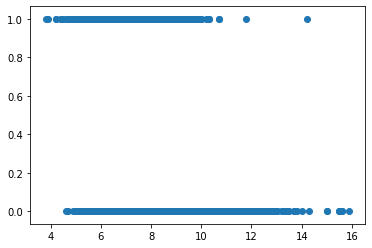

In [36]:
plt.scatter(X[:,0].reshape(-1),Y.reshape(-1))